<a href="https://colab.research.google.com/github/bea-dom/TelecomX_Part2/blob/main/C%C3%B3pia_de_TelecomX_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparando o ambiente

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

#📌 Extração

Vamos utilizar a URL do arquivo JSON para acessar os dados, e a função `pd.read_json` para carregar esses dados em um dataset, que será salvo na variável `dados`

In [3]:
url = 'https://raw.githubusercontent.com/bea-dom/TelecomX_Part2/refs/heads/main/TelecomX_Tratado.csv'
dados = pd.read_csv(url)
dados.head(3)

,Unnamed: 0,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,ChargesDay
0,0,0002-ORFBO,False,Female,False,True,True,9,True,No,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.186667
1,1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,2,0004-TLHLJ,True,Male,False,False,False,4,True,No,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333


Analisando as colunas de `dados` notamos que algumas informações de 'customer', 'phone, 'internet' e 'account' estão aninhadas. Para que esses dados sejam devidamente carregados no data frame vamos utilizar a função `pd.json_normalize` para normalizar os dados de cada uma dessas 'colunas', e depois usar a função `pd.concat` para concatenar todos os dados em um único dataframe



In [ ]:
# Normaliza cada parte que esta aninhada
customer = pd.json_normalize(dados['customer'])
phone = pd.json_normalize(dados['phone'])
internet = pd.json_normalize(dados['internet'])
account = pd.json_normalize(dados['account'])

# Concatena de volta com as colunas principais
df = pd.concat(
    [dados[['customerID','Churn']], customer, phone, internet, account],
    axis=1
)

df.head(20)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


# 🔧 Transformação

## Conhecendo o dataset

Vamos ver como os dados estão distribuidos em linhas e colunas

In [ ]:
df.shape

(7267, 21)

Vamos verificar qual tipo de dado está sendo armazenado em cada coluna:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### Proporção de Dados

In [ ]:
df.Churn.value_counts()

,count
Churn,
False,5174
True,1869


In [ ]:
df.Dependents.value_counts()

,count
Dependents,
False,5086
True,2181


In [ ]:
df.SeniorCitizen.value_counts()

,count
SeniorCitizen,
False,6085
True,1182


In [ ]:
df.MultipleLines.value_counts()

,count
MultipleLines,
No,3495
Yes,3065
No service,707


Podemos observar que muitos dados estão sendo armazenados como object, que não é um formato muito apropriado para análise dos dados.

Observando o dicionario de dados, é possível supor que o melhor tipo de dados para análisar cada coluna é a seguinte:

- customerID:		str
- Churn:			boolean
- gender:			str
- SeniorCitizen:		boolean
- Partner:			boolean
- Dependents:		boolean
- tenure:			int
- PhoneService:		boolean
- MultipleLines:		boolean
- InternetService:		str
- OnlineSecurity:		boolean
- OnlineBackup:		boolean
- DeviceProtection:	boolean
- TechSupport:		boolean
- StreamingTV:		boolean
- StreamingMovies:		boolean
- Contract:		str
- PaperlessBilling:	boolean
- PaymentMethod:		str
- Charges.Monthly:		float
- Charges.Total:		float

## Identificando e Corrigindo inconsistencias nos dados

### Ajustando os dados boolean

Antes de realizarmos as alterações do tipo de dado de cada coluna, vamos verificar se, para as colunas que parecem boolen são, de fato, preenchida por dados que booleanos (1/0 ou yes/no)

In [ ]:
parece_dados_boolean = [
    "Churn",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "PaperlessBilling"
]


for col in parece_dados_boolean:
    print(f"{col}: {df[col].unique()}")

Churn: ['No' 'Yes' '']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
PaperlessBilling: ['Yes' 'No']


Com esse visão podemos concluir que:
- A coluna Churn possuí dados nulos
- As colunas Churn, SeniorCitizen, Partner, Dependents, PhoneService, PaperlessBilling podem ser formatadas como dados booleando
- As colunas
t, StreamingTV, StreamingMovies são melhor formatas em categorias, já que possuí mais de 2 tipos de valores possíveis

Agora, vamos seguir com essas alterações:


In [ ]:
df['Churn'] = df['Churn'].map({"Yes": True, "No": False, ' ':np.nan})
df['Churn']=df['Churn'].astype("boolean")
df['Churn'].unique()

<BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean

In [ ]:
# cria uma lista com os dados que precisam ser formatados como boolean
dados_boolean = [
    "Partner",
    "Dependents",
    "PhoneService",
    "PaperlessBilling"
]

# transforma os dados 'yes' em True e 'no' em False, e depois as colunas em dtype: boolean
for col in dados_boolean:
    df[col] = df[col].map({"Yes": True, "No": False})
    df[col]=df[col].astype(bool)

# para coluna 'SeniorCitizen' transforma os dados '1' em True e '0' em False, e depois as colunas em dtype: boolean
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: True, 0: False})
df['SeniorCitizen']=df['SeniorCitizen'].astype(bool)

#### Validando

In [ ]:
df.Churn.value_counts()

,count
Churn,
False,5174
True,1869


In [ ]:
df.Dependents.value_counts()

,count
Dependents,
False,5086
True,2181


In [ ]:
df.SeniorCitizen.value_counts()

,count
SeniorCitizen,
False,6085
True,1182


In [ ]:
for col in parece_dados_boolean:
    print(f"{col}: {df[col].unique()}")

Churn: <BooleanArray>
[False, True, <NA>]
Length: 3, dtype: boolean
SeniorCitizen: [False  True]
Partner: [ True False]
Dependents: [ True False]
PhoneService: [ True False]
MultipleLines: ['No' 'Yes' 'No phone service']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
PaperlessBilling: [ True False]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   boolean
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   bool   
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### Ajustando dados category

In [ ]:
df.MultipleLines.value_counts()

,count
MultipleLines,
No,3495
Yes,3065
No service,707


In [ ]:
dados_category = [
    "MultipleLines",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
]

for col in dados_category:
    df[col] = df[col].map({"Yes": "Yes", "No":"No", "No phone service":"No service", "No internet service":"No service"})
    df[col]=df[col].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7267 non-null   object  
 1   Churn             7043 non-null   boolean 
 2   gender            7267 non-null   object  
 3   SeniorCitizen     7267 non-null   bool    
 4   Partner           7267 non-null   bool    
 5   Dependents        7267 non-null   bool    
 6   tenure            7267 non-null   int64   
 7   PhoneService      7267 non-null   bool    
 8   MultipleLines     7267 non-null   category
 9   InternetService   7267 non-null   object  
 10  OnlineSecurity    7267 non-null   category
 11  OnlineBackup      7267 non-null   category
 12  DeviceProtection  7267 non-null   category
 13  TechSupport       7267 non-null   category
 14  StreamingTV       7267 non-null   category
 15  StreamingMovies   7267 non-null   category
 16  Contract          7267 n

In [ ]:
print(f"gender: {df['gender'].unique()}")
print(f"InternetService: {df['InternetService'].unique()}")
print(f"Contract: {df['Contract'].unique()}")
print(f"PaymentMethod: {df['PaymentMethod'].unique()}")

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['One year' 'Month-to-month' 'Two year']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [ ]:
df['gender']=df['gender'].astype("category")
df['InternetService']=df['InternetService'].astype("category")
df['Contract']=df['Contract'].astype("category")
df['PaymentMethod']=df['PaymentMethod'].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7267 non-null   object  
 1   Churn             7043 non-null   boolean 
 2   gender            7267 non-null   category
 3   SeniorCitizen     7267 non-null   bool    
 4   Partner           7267 non-null   bool    
 5   Dependents        7267 non-null   bool    
 6   tenure            7267 non-null   int64   
 7   PhoneService      7267 non-null   bool    
 8   MultipleLines     7267 non-null   category
 9   InternetService   7267 non-null   category
 10  OnlineSecurity    7267 non-null   category
 11  OnlineBackup      7267 non-null   category
 12  DeviceProtection  7267 non-null   category
 13  TechSupport       7267 non-null   category
 14  StreamingTV       7267 non-null   category
 15  StreamingMovies   7267 non-null   category
 16  Contract          7267 n

In [ ]:
print(f"gender: {df['gender'].unique()}")
print(f"InternetService: {df['InternetService'].unique()}")
print(f"Contract: {df['Contract'].unique()}")
print(f"PaymentMethod: {df['PaymentMethod'].unique()}")

gender: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
InternetService: ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
Contract: ['One year', 'Month-to-month', 'Two year']
Categories (3, object): ['Month-to-month', 'One year', 'Two year']
PaymentMethod: ['Mailed check', 'Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)']
Categories (4, object): ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check',
                         'Mailed check']


### Ajustando os dado float

A coluna 'Charges.Total' contem informações de valores porém foi carregada como object, então vamos corrigir esse dado:

In [ ]:
#comentado para facilitar a execução de todos os blocos, descomente para visualizar o erro
#df['Charges.Total'] = df['Charges.Total'].astype(np.float64)

Com esse erro identificamos que existem dados nulos nessa coluna que não estão devidamente formatados, então vamos corrigir esses dados antes de transformar a estrutura de dados da coluna 'Charges.Total' para float

In [ ]:
import numpy as np

df['Charges.Total'] = df['Charges.Total'].replace(' ', np.nan)
df['Charges.Total'] = df['Charges.Total'].astype(np.float64)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7267 non-null   object  
 1   Churn             7043 non-null   boolean 
 2   gender            7267 non-null   category
 3   SeniorCitizen     7267 non-null   bool    
 4   Partner           7267 non-null   bool    
 5   Dependents        7267 non-null   bool    
 6   tenure            7267 non-null   int64   
 7   PhoneService      7267 non-null   bool    
 8   MultipleLines     7267 non-null   category
 9   InternetService   7267 non-null   category
 10  OnlineSecurity    7267 non-null   category
 11  OnlineBackup      7267 non-null   category
 12  DeviceProtection  7267 non-null   category
 13  TechSupport       7267 non-null   category
 14  StreamingTV       7267 non-null   category
 15  StreamingMovies   7267 non-null   category
 16  Contract          7267 n

### Registros duplicados


O 'customerID' é um identificador único de cada consumidor.
Vamos analisar de há dados duplicados nessa coluna, e se houver, vamos tentar identificár os registros duplicados, validar se todos os atributos são identicos, e se forem, excluir as duplicidades

In [ ]:
linhas, colunas = df.shape
qdd_customerID_unicos = len(df['customerID'].unique())
print(f'A quantidade de registros totais na tabela é {linhas} e a quantidade ID distintos na coluna customerID é {qdd_customerID_unicos}')

A quantidade de registros totais na tabela é 7267 e a quantidade ID distintos na coluna customerID é 7267


Com isso verificamos que não há registros duplicados

## Coluna de Contas Diárias

In [ ]:
df['Charges.Day'] = df['Charges.Monthly']/30
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Day
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,True,True,False,13,True,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,True,True,False,3,True,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.796667


In [ ]:
df['Charges.Day'].dtype

dtype('float64')

## Padronizando nomes

In [ ]:
df = df.rename(columns={"Charges.Total": "ChargesTotal"})
df = df.rename(columns={"Charges.Monthly": "ChargesMonthly"})
df = df.rename(columns={"Charges.Day": "ChargesDay"})

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,ChargesDay
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,True,True,False,13,True,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,True,True,False,3,True,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.796667


# 📊 Carga e análise

## Padrão Visual

In [ ]:
rosa = '#dc7b6e'
rosaClaro= '#fce4d6'
rosaEscuro = '#ae2e1e'
rosaMtEscuro = '#8c2518'
rosaVivo = '#e5604e'
cinzaClaro = '#efefef'
cinzaEscuro = '#cccccc'

## Proporção geral de Churn

In [ ]:
contagem_churn = df['Churn'].value_counts()
contagem_churn.index = ['Sem Churn', 'Com Churn']
contagem_churn

,count
Sem Churn,5174
Com Churn,1869


<Axes: title={'center': 'Contagem de clientes'}>

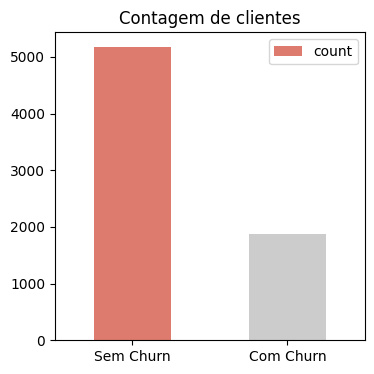

In [ ]:
contagem_churn.plot(
    kind='bar',
    color= [rosa,cinzaEscuro],
    rot=0,
    title='Contagem de clientes',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

<Axes: title={'center': 'Proporção de clientes'}, ylabel='count'>

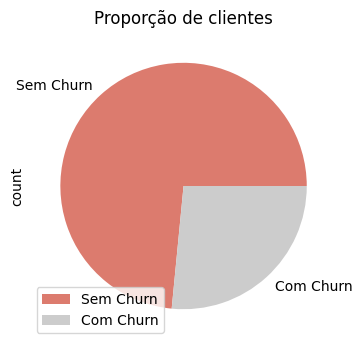

In [ ]:
contagem_churn.plot(
    kind='pie',
    colors= [rosa,cinzaEscuro],
    rot=0,
    title='Proporção de clientes',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

## Análise do Churn pelo perfil do cliente

### Gênero

Com as análises abaixo é possível concluir que, apesar da taxa de evasão ser um pouco inferior entre clientes homens, a proporção de churn entre os generos é bem equilibrada

In [ ]:
genero = df.groupby('gender')['Churn'].value_counts().unstack()
genero.columns = ['Sem_Churn', 'Com_Churn']
genero

/tmp/ipython-input-2716481865.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genero = df.groupby('gender')['Churn'].value_counts().unstack()


,Sem_Churn,Com_Churn
gender,,
Female,2549,939
Male,2625,930


<Axes: title={'center': 'Quantidade de clientes por gênero'}, xlabel='gender'>

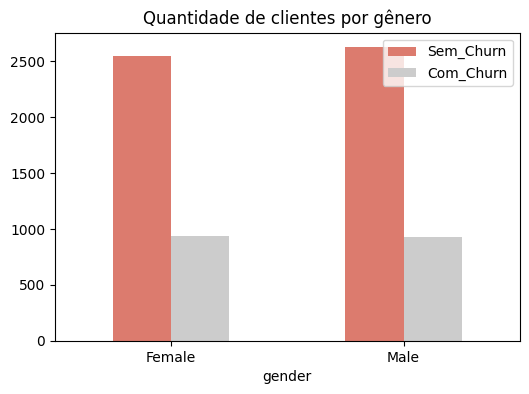

In [ ]:
genero.plot(
    kind='bar',
    color=[rosa,cinzaEscuro],  # cores para False e True
    figsize=(6,4),
    rot=0,
    title='Quantidade de clientes por gênero'
)

<Axes: title={'center': 'Proporção de Churn por clientes Homens'}, ylabel='Male'>

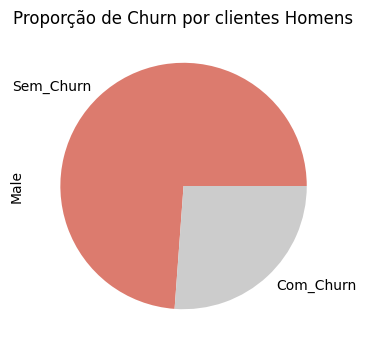

In [ ]:
genero.loc['Male'].plot(
    kind='pie',
    colors= [rosa,cinzaEscuro],
    rot=0,
    title='Proporção de Churn por clientes Homens',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    #legend=True          # mostrar legenda (True ou False)
)

<Axes: title={'center': 'Proporção de Churn por clientes Mulheres'}, ylabel='Female'>

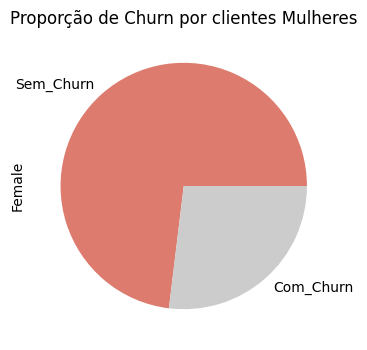

In [ ]:
genero.loc['Female'].plot(
    kind='pie',
    colors= [rosa,cinzaEscuro],
    rot=0,
    title='Proporção de Churn por clientes Mulheres',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    #legend=True          # mostrar legenda (True ou False)
)

<Axes: title={'center': 'Proporção de genero com Churn'}, ylabel='Com_Churn'>

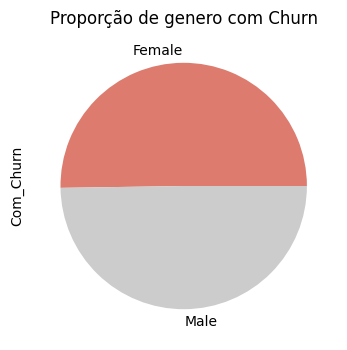

In [ ]:
genero.Com_Churn.plot(
    kind='pie',
    colors= [rosa,cinzaEscuro],
    rot=0,
    title='Proporção de genero com Churn',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    #legend=True          # mostrar legenda (True ou False)
)

### Em clientes idosos

Com as análises abaixo é possível observar que, apesar da maior volumetria dos Churns ser entre clientes com menos de 65 anos, a taxa de evasão entre clientes idosos (+65 anos) é consideravelmente superior que nos demais clientes,

In [ ]:
idosos = pd.crosstab(df['SeniorCitizen'],df['Churn'])
idosos.columns = ['Sem_Churn','Com_Churn']
idosos.index = ['Menos_65anos', 'Mais_65anos']
idosos

,Sem_Churn,Com_Churn
Menos_65anos,4508,1393
Mais_65anos,666,476


<Axes: title={'center': 'Quantidade de Churn por genero'}>

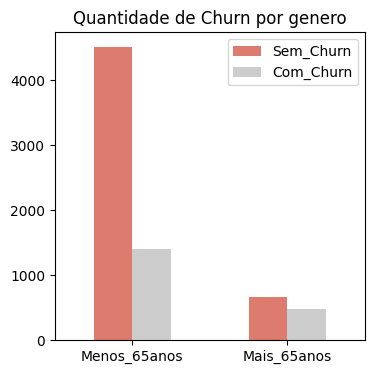

In [ ]:
idosos.plot(
    kind='bar',
    color= [rosa,cinzaEscuro],
    rot=0,
    title='Quantidade de Churn por genero',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

<Axes: title={'center': 'Proporção Churn em clientes com -65 anos'}, ylabel='Menos_65anos'>

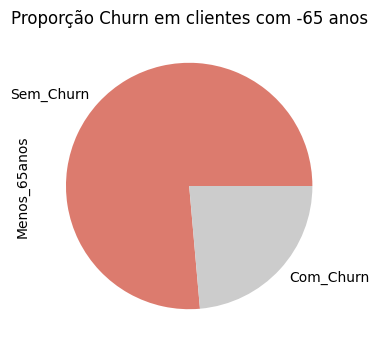

In [ ]:
idosos.loc['Menos_65anos'].plot(
    kind='pie',
    colors= [rosa,cinzaEscuro],
    rot=0,
    title='Proporção Churn em clientes com -65 anos',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    #legend=True          # mostrar legenda (True ou False)
)

<Axes: title={'center': 'Proporção Churn em clientes com +65 anos'}, ylabel='Mais_65anos'>

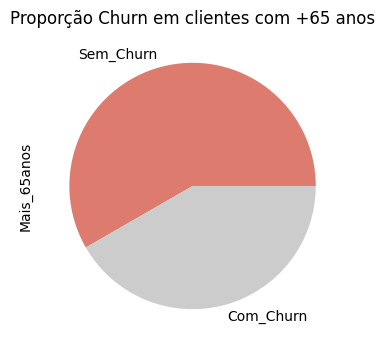

In [ ]:
idosos.loc['Mais_65anos'].plot(
    kind='pie',
    colors= [rosa,cinzaEscuro],
    rot=0,
    title='Proporção Churn em clientes com +65 anos',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    #legend=True          # mostrar legenda (True ou False)
)

### Estado civil

Com as análises abaixo é possível observar que a evasão de clientes é mais intensa em clientes sem parceiros, e que estes representam grande parte dos casos de Churn

In [ ]:
Parceiro = pd.crosstab(df['Partner'],df['Churn'])
Parceiro.columns = ['Sem_Churn','Com_Churn']
Parceiro.index = ['Sem_Parceiro', 'Com_parceiro']

<Axes: title={'center': 'Quantidade de Churn por estado civil'}>

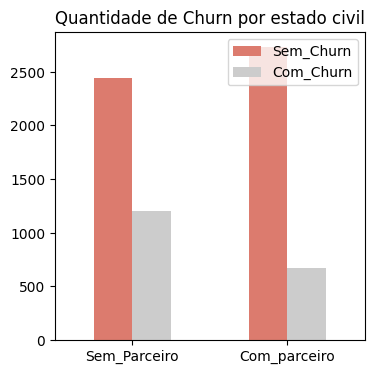

In [ ]:
Parceiro.plot(
    kind='bar',
    color= [rosa,cinzaEscuro],
    rot=0,
    title='Quantidade de Churn por estado civil',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

In [ ]:
Parceiro['% Churn'] = Parceiro['Com_Churn'] / (Parceiro['Com_Churn']+Parceiro['Sem_Churn'])
Parceiro

,Sem_Churn,Com_Churn,% Churn
Sem_Parceiro,2441,1200,0.329580
Com_parceiro,2733,669,0.196649


### Dependentes

Com as análises abaixo é possível observar que a evasão de clientes é mais intensa em clientes sem dependentes, e que estes representam grande parte dos casos de Churn

In [ ]:
Dependents = pd.crosstab(df['Dependents'],df['Churn'])
Dependents.columns = ['Sem_Churn','Com_Churn']
Dependents.index = ['Sem_Dependents', 'Com_Dependents']

<Axes: title={'center': 'Quantidade de Churn por clientes com e sem Dependents'}>

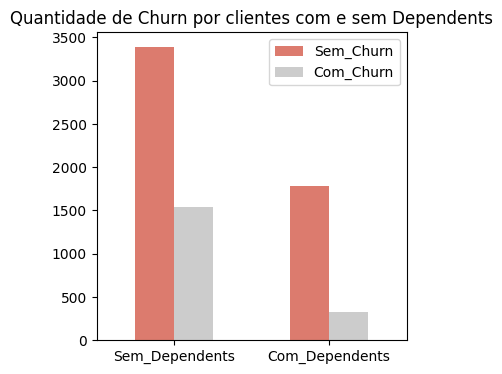

In [ ]:
Dependents.plot(
    kind='bar',
    color= [rosa,cinzaEscuro],
    rot=0,
    title='Quantidade de Churn por clientes com e sem Dependents',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

In [ ]:
Dependents['% Churn'] = Dependents['Com_Churn'] / (Dependents['Com_Churn']+Dependents['Sem_Churn'])
Dependents

,Sem_Churn,Com_Churn,% Churn
Sem_Dependents,3390,1543,0.312791
Com_Dependents,1784,326,0.154502


<Axes: title={'center': 'Proporção de clientes com e sem dependentes'}, ylabel='Com_Churn'>

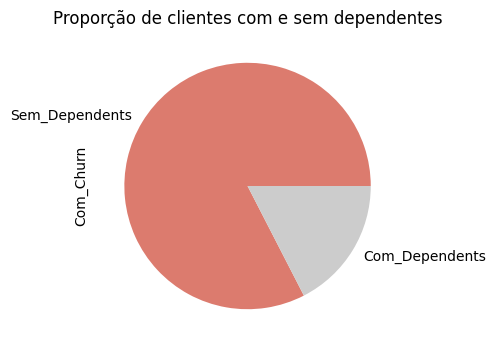

In [ ]:
Dependents.Com_Churn.plot(
    kind='pie',
    colors= [rosa,cinzaEscuro],
    rot=0,
    title='Proporção de clientes com e sem dependentes',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    #legend=True          # mostrar legenda (True ou False)
)

### Tempo de contrato

Notamos que grande parte da evasão está em clientes com menos de 10 meses de contrato

<Axes: title={'center': 'Concentração de Churn por tempo de contrato'}, xlabel='tenure'>

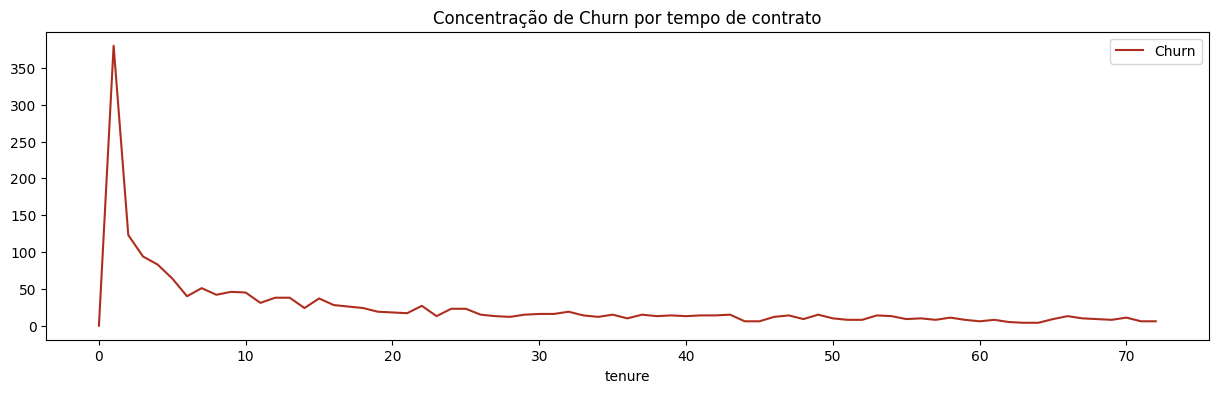

In [ ]:
df.groupby('tenure')['Churn'].sum().plot(
    kind='line',
    color= [rosaEscuro],
    rot=0,
    title='Concentração de Churn por tempo de contrato',  # título do gráfico
    figsize=(15,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

### Tipo de contrato

Com as análises abaixo é possível observar que a evasão de clientes é mais intensa em clientes com contrato mensal, e que estes representam grande parte dos casos de Churn

In [ ]:
Contract = pd.crosstab(df['Contract'],df['Churn'])
Contract.columns = ['Sem_Churn','Com_Churn']
Contract.index = ['Mensal','Um_ano', 'Dois-Anos']

<Axes: title={'center': 'Quantidade de Churn por tipo de contrato'}>

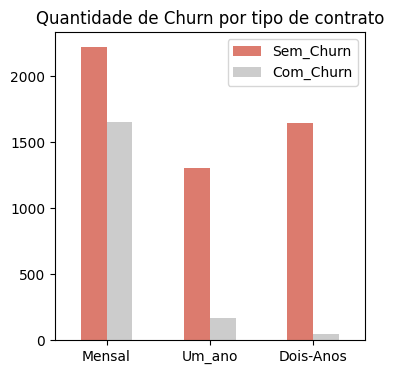

In [ ]:
Contract.plot(
    kind='bar',
    color= [rosa,cinzaEscuro],
    rot=0,
    title='Quantidade de Churn por tipo de contrato',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

In [ ]:
Contract['% Churn'] = Contract['Com_Churn'] / (Contract['Com_Churn']+Contract['Sem_Churn'])
Contract

,Sem_Churn,Com_Churn,% Churn
Mensal,2220,1655,0.427097
Um_ano,1307,166,0.112695
Dois-Anos,1647,48,0.028319


### Tipo de cobrança
Com as análises abaixo é possível observar que a evasão de clientes é mais intensa em clientes que escolhem receber cobranças virtuais, e que estes representam grande parte dos casos de Churn

In [ ]:
PaperlessBilling = pd.crosstab(df['PaperlessBilling'],df['Churn'])
PaperlessBilling.columns = ['Sem_Churn','Com_Churn']
PaperlessBilling.index = ['Cobranca_Fisica','Cobranca_Digital']


<Axes: title={'center': 'Quantidade de Churn por tipo de cobrança'}>

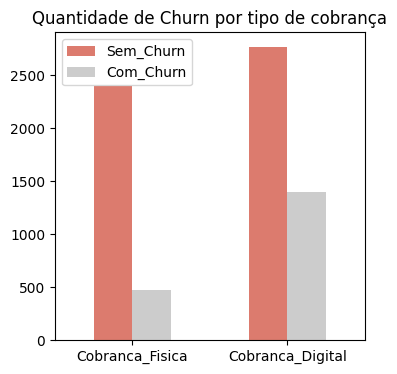

In [ ]:
PaperlessBilling.plot(
    kind='bar',
    color= [rosa,cinzaEscuro],
    rot=0,
    title='Quantidade de Churn por tipo de cobrança',  # título do gráfico
    figsize=(4,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

In [ ]:
PaperlessBilling['% Churn'] = PaperlessBilling['Com_Churn'] / (PaperlessBilling['Com_Churn']+PaperlessBilling['Sem_Churn'])
PaperlessBilling

,Sem_Churn,Com_Churn,% Churn
Cobranca_Fisica,2403,469,0.163301
Cobranca_Digital,2771,1400,0.335651


### Metodo de pagamento
Com as análises abaixo é possível observar que a evasão de clientes é mais intensa em clientes que escolhem pagar as cobranças por 'Electronic check', e que estes representam grande parte dos casos de Churn

In [ ]:
PaymentMethod = pd.crosstab(df['PaymentMethod'],df['Churn'])
PaymentMethod.columns = ['Sem_Churn','Com_Churn']
PaymentMethod

,Sem_Churn,Com_Churn
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


<Axes: title={'center': 'Quantidade de Churn por metodo de pagamento'}, xlabel='PaymentMethod'>

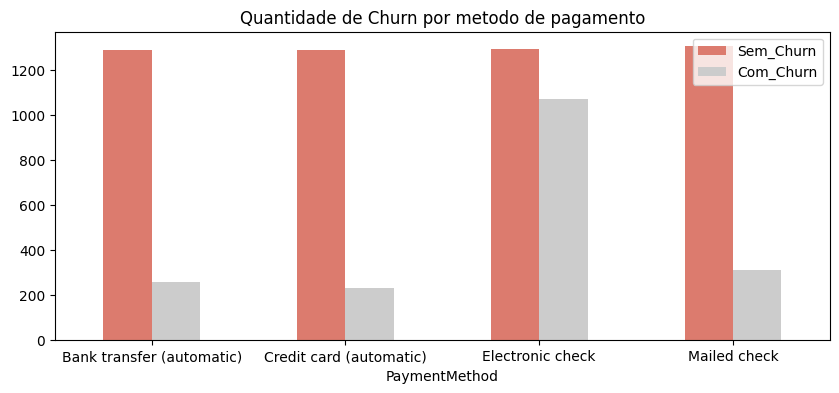

In [ ]:
PaymentMethod.plot(
    kind='bar',
    color= [rosa,cinzaEscuro],
    rot=0,
    title='Quantidade de Churn por metodo de pagamento',  # título do gráfico
    figsize=(10,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

In [ ]:
PaymentMethod['% Churn'] = PaymentMethod['Com_Churn'] / (PaymentMethod['Com_Churn']+PaymentMethod['Sem_Churn'])
PaymentMethod

,Sem_Churn,Com_Churn,% Churn
PaymentMethod,,,
Bank transfer (automatic),1286,258,0.167098
Credit card (automatic),1290,232,0.152431
Electronic check,1294,1071,0.452854
Mailed check,1304,308,0.191067


## Análise de Churn pelos serviços contratados

### Serviços de telefonia

Nesta análise é possível notar que, apesar de grande parte dos Churns serem de clientes com serviços de telefonia, a evasão entre dos clientes com serviço de telefonia é muito próxima a de clientes sem serviços de telefonia.

Além disso, dos clientes com serviços de telefonia, a evasão é maior em clientes com multiplas linhas



In [ ]:
PhoneService = pd.crosstab(df['PhoneService'],df['Churn'])
PhoneService.columns = ['Sem_Churn','Com_Churn']
PhoneService.index = ['Sem_Servicos_Telefonicos','Com_Servicos_Telefonicos']
PhoneService

,Sem_Churn,Com_Churn
Sem_Servicos_Telefonicos,512,170
Com_Servicos_Telefonicos,4662,1699


<Axes: title={'center': 'Quantidade de Churn nos serviços telefonicos'}>

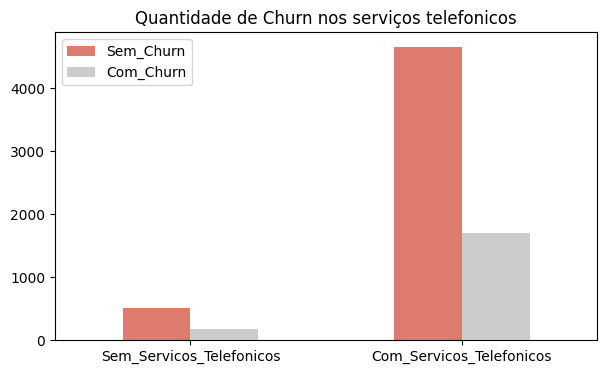

In [ ]:
PhoneService.plot(
    kind='bar',
    color= [rosa,cinzaEscuro],
    rot=0,
    title='Quantidade de Churn nos serviços telefonicos',  # título do gráfico
    figsize=(7,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

In [ ]:
PhoneService['% Churn'] = PhoneService['Com_Churn'] / (PhoneService['Com_Churn']+PhoneService['Sem_Churn'])
PhoneService

,Sem_Churn,Com_Churn,% Churn
Sem_Servicos_Telefonicos,512,170,0.249267
Com_Servicos_Telefonicos,4662,1699,0.267096


In [ ]:
MultipleLines = df.query('PhoneService ==True')
MultipleLines = pd.crosstab(MultipleLines['MultipleLines'],df['Churn'])
MultipleLines.columns = ['Sem_Churn','Com_Churn']
MultipleLines.index = ['Sem_Multiplas_Linhas','Com_Multiplas_Linhas']
MultipleLines


,Sem_Churn,Com_Churn
Sem_Multiplas_Linhas,2541,849
Com_Multiplas_Linhas,2121,850


<Axes: title={'center': 'Churn em clientes com e sem multiplas linhas'}>

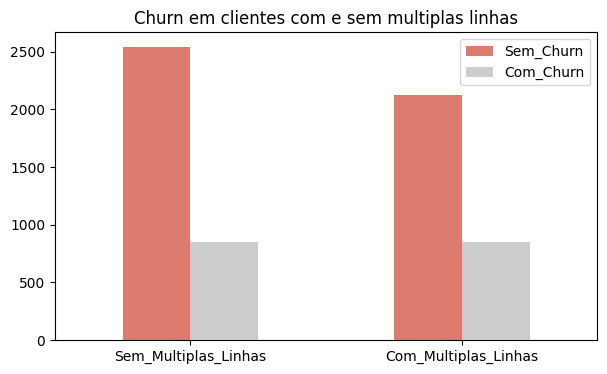

In [ ]:
MultipleLines.plot(
    kind='bar',
    color= [rosa,cinzaEscuro],
    rot=0,
    title='Churn em clientes com e sem multiplas linhas',  # título do gráfico
    figsize=(7,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

### Serviços de Internet

Nessa análise é possível concluir que a taxa de evasão dos clientes que possuem serviços de internet é consideravelmente maior se comparada aos clientes que não possuem.

Além disso, dos clientes que contratam internet, aqueles que a internet é provida por "DSL" tem uma altissima taxa de evasão, muito superior aos clientes de "Fiber Optic".

Por fim, é possível observar também que dentre os clientes com Churn a maioria deles não havia contratado serviços adicionais de, OnlineSecurity, OnlineBackup, DeviceProtection e TechSupport porém cerca de metade dos Churns haviam contratado StreamingTV e StreamingMovies

In [ ]:
InternetService = pd.crosstab(df['InternetService'],df['Churn'])
InternetService.columns = ['Sem_Churn','Com_Churn']
InternetService

,Sem_Churn,Com_Churn
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


<Axes: title={'center': 'Quantidade de Churn por fornecedor de telefonia'}, xlabel='InternetService'>

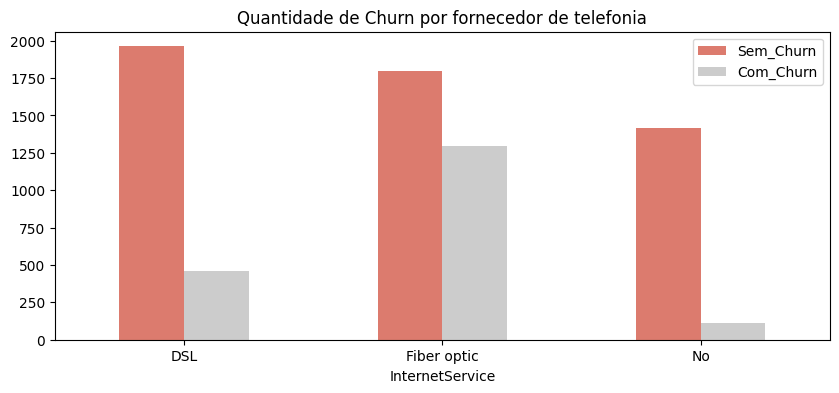

In [ ]:
InternetService.plot(
    kind='bar',
    color= [rosa,cinzaEscuro],
    rot=0,
    title='Quantidade de Churn por fornecedor de telefonia',  # título do gráfico
    figsize=(10,4),       # tamanho da figura (largura, altura)
    legend=True          # mostrar legenda (True ou False)
)

In [ ]:
InternetService['% Churn'] = InternetService['Com_Churn'] / (InternetService['Com_Churn']+InternetService['Sem_Churn'])
InternetService

,Sem_Churn,Com_Churn,% Churn
InternetService,,,
DSL,1962,459,0.189591
Fiber optic,1799,1297,0.418928
No,1413,113,0.074050


In [ ]:
Internet_on = df.query('InternetService == "DSL" | InternetService == "Fiber optic"')

OnlineSecurity = pd.crosstab(Internet_on['OnlineSecurity'],Internet_on['Churn'])
OnlineBackup = pd.crosstab(Internet_on['OnlineBackup'],Internet_on['Churn'])
DeviceProtection = pd.crosstab(Internet_on['DeviceProtection'],Internet_on['Churn'])
TechSupport = pd.crosstab(Internet_on['TechSupport'],Internet_on['Churn'])
StreamingTV = pd.crosstab(Internet_on['StreamingTV'],Internet_on['Churn'])
StreamingMovies = pd.crosstab(Internet_on['StreamingMovies'],Internet_on['Churn'])

tabelas = {
    'OnlineSecurity': OnlineSecurity[True],
    'OnlineBackup': OnlineBackup[True],
    'DeviceProtection': DeviceProtection[True],
    'TechSupport': TechSupport[True],
    'StreamingTV': StreamingTV[True],
    'StreamingMovies': StreamingMovies[True]
}

servicosAdicionaisInternet = pd.DataFrame(tabelas)
servicosAdicionaisInternet

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
No,1461,1233,1211,1446,942,938
Yes,295,523,545,310,814,818


# 📄 Relatorio Final

## Introdução


O objetivo desta análise é entender o fenômeno de evasão de clientes (Churn) em uma empresa de telecomunicações. O Churn corresponde aos clientes que cancelam o serviço, o que representa um desafio estratégico, já que reter clientes costuma ser mais barato e vantajoso do que adquirir novos.

Assim, a análise buscou identificar padrões e fatores relacionados ao cancelamento, considerando características do perfil dos clientes, e dos serviços contratados, análisando dados númericos, categóricos e boolean. Esses insights podem apoiar a criação de estratégias para reduzir a evasão e aumentar a retenção.

## Limpeza e Tratamento de Dados

Os dados utilizados foram extraídos de um arquivo JSON, com a normalização das informações presentes nas seções customer, phone, internet e account. Em seguida, o conjunto de dados foi explorado por meio de funções como shape, info e head, possibilitando uma visão inicial da estrutura. Com base no dicionário de dados e na interpretação das variáveis, foi definido o formato mais adequado para cada coluna, distinguindo quais deveriam ser categóricas, booleanas ou numéricas. Para isso, foram aplicados mapeamentos (map) para adequar o conteúdo antes da conversão de tipo com astype. Cada alteração foi validada comparando a distribuição das categorias antes e depois, assegurando a consistência das informações. Também foi realizada a verificação de duplicidade nos registros por meio do campo customerID. Por fim, as colunas foram padronizadas em sua nomenclatura e foi criada a variável Charges.Day, permitindo novas análises.

## Análise Exploratória de Dados

A análise exploratória foi organizada em duas partes principais: o perfil do cliente e os serviços contratados. Para variáveis categóricas e booleanas, foram construídas tabelas auxiliares utilizando a função crosstab, cruzando os dados de Churn com cada variável analisada. Esse procedimento permitiu observar a quantidade de clientes que permaneceram ou cancelaram em cada categoria. Em seguida, foram gerados gráficos a partir dessas tabelas e, em alguns casos, adicionada uma coluna extra para calcular a taxa de evasão por categoria. Essa abordagem possibilitou identificar tanto o perfil mais representativo dentro do Churn quanto a proporção relativa de cancelamentos em cada grupo. Em várias análises, as categorias com maior número absoluto de cancelamentos também apresentaram maior taxa de evasão, mas em outras situações os resultados divergiram, evidenciando padrões distintos.

Já para as variáveis numéricas, foram avaliadas estatísticas descritivas como média, mediana, valores máximos e mínimos. Além disso, foram criados gráficos de distribuição que auxiliaram na visualização do comportamento do Churn em diferentes faixas de valor, facilitando a identificação de tendências e concentrações relevantes.

## Conclusões e Insights

A análise revelou diversos padrões relevantes sobre a evasão de clientes. No perfil do cliente, apesar de a taxa de churn ser ligeiramente menor entre homens, a proporção de evasão entre gêneros é equilibrada. Clientes idosos (+65 anos) apresentam uma taxa de evasão significativamente maior, mesmo que a maior volumetria de churn esteja entre clientes mais jovens. A evasão é mais intensa entre clientes sem parceiros ou sem dependentes, e grande parte dos cancelamentos ocorre em clientes com menos de 10 meses de contrato, com contratos mensais, cobranças virtuais ou pagamento via Electronic check.

Quanto aos serviços contratados, a presença de telefonia não reduz a evasão, mas clientes com múltiplas linhas apresentam maior churn. Entre os serviços de internet, a taxa de evasão é maior do que entre clientes sem internet, sendo especialmente elevada em clientes que utilizam a tecnologia DSL em comparação à Fiber Optic. Além disso, a maioria dos clientes que cancelaram não havia contratado serviços adicionais como OnlineSecurity, OnlineBackup, DeviceProtection ou TechSupport, embora cerca de metade deles possuísse StreamingTV ou StreamingMovies.

Esses insights indicam que estratégias focadas em retenção de clientes jovens e idosos, clientes sem parceiros/dependentes, contratos mensais e métodos de pagamento específicos, bem como promoção de serviços adicionais e melhorias na oferta de internet, podem ser fundamentais para reduzir a evasão e aumentar a retenção de clientes.

## Recomendações

Com base na análise exploratória, algumas recomendações podem ser sugeridas para reduzir a evasão de clientes:

Expansão da análise para relações entre variáveis: Avaliar como diferentes fatores combinados influenciam o churn, como idade e tipo de contrato, ou tipo de serviço e método de pagamento. Isso permitiria identificar segmentos de clientes com maior risco de evasão e direcionar ações específicas.

Foco em clientes de maior risco: Desenvolver estratégias específicas para clientes com contratos mensais, jovens e idosos, clientes sem parceiros ou dependentes, e aqueles que utilizam métodos de pagamento mais propensos a churn, como Electronic check.

In [ ]:
df.to_csv('TelecomX_Tratado.csv')